4

In [124]:
from IPython.display import Latex
import numpy as np
import matplotlib.pyplot as plt

In [125]:
#Import dataset
import sklearn
from sklearn import datasets
diabetes = sklearn.datasets.load_diabetes() 

In [126]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

c:\Users\elias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\elias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


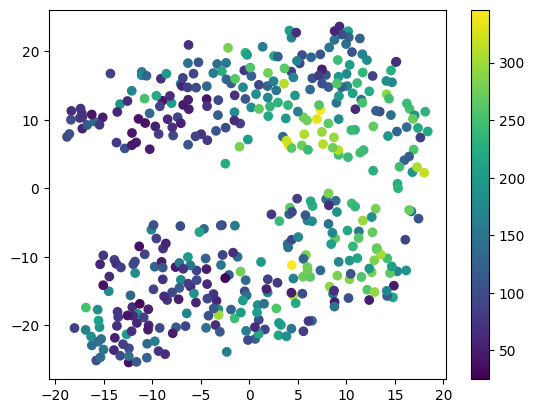

In [127]:
#4.a 
from sklearn.manifold import TSNE
x = diabetes["data"]
y = diabetes["target"]
d = 2
tsne = TSNE(d)
tsne_result = tsne.fit_transform(x)

points = plt.scatter(tsne_result[:, 0], tsne_result[:,1], c = y, cmap = 'viridis')
plt.colorbar(points)

In [128]:
display(Latex(r"\newpage"))


<IPython.core.display.Latex object>

4.b
The feature is sex.

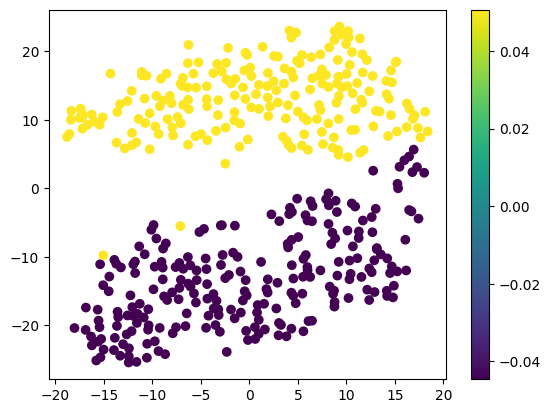

In [129]:
points = plt.scatter(tsne_result[:, 0], tsne_result[:,1], c = x[:,1], cmap = 'viridis')
plt.colorbar(points)

In [130]:
display(Latex(r"\newpage"))


<IPython.core.display.Latex object>

c:\Users\elias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\elias\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


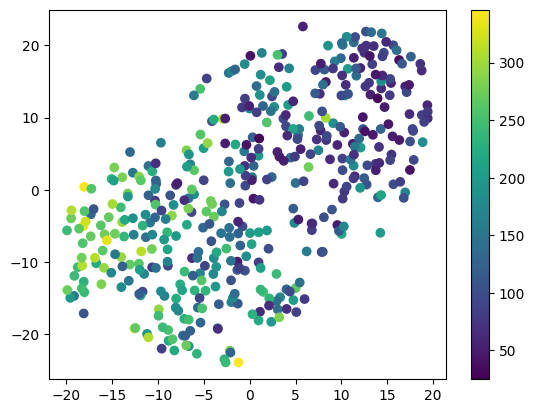

In [131]:
#4.c
new_x = np.delete(diabetes["data"], axis = 1, obj = 1)
tsne = TSNE(d)

new_result = tsne.fit_transform(new_x)

points = plt.scatter(new_result[:, 0], new_result[:,1], c = y, cmap = 'viridis')
plt.colorbar(points)


We do not see any two clear clusters anymore since tsne does not differentiate on sex. In other words, most of the data points got a lot of their variance from sex meaning females and males are quite similar besides being of different genders. The fact that sex was included ended up with "pulling" the data apart and forming two clusters.

If the change did not occur and we did still see two clear clusters, it would mean that there would be another feature which was very binary in its distribution. If age was split in above 50 or below 50 this would also form two clusters.

In [132]:
display(Latex(r"\newpage"))


<IPython.core.display.Latex object>

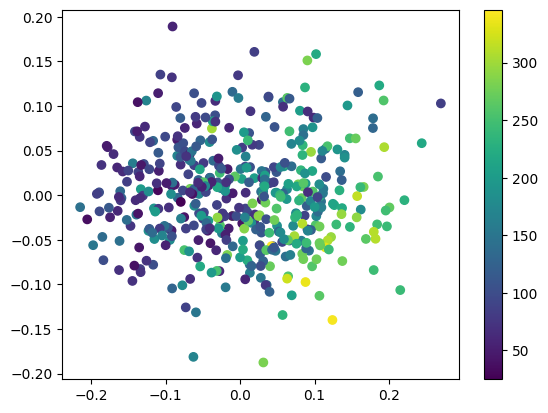

In [133]:
#4.d 
from sklearn.decomposition import PCA
pca = PCA(d)
pca_result = pca.fit_transform(x)
points = plt.scatter(pca_result[:, 0], pca_result[:,1], c = y, cmap = "viridis")
plt.colorbar(points)

In [134]:
display(Latex(r"\newpage"))


<IPython.core.display.Latex object>

In [135]:
#4.e
def MSE(y_hat, y_true):
    return (1/y_hat.shape[0])*np.sum((y_hat - y_true)**2)

X_train = x[:100]
y_train = y[:100]
X_test = x[100:]
y_test = y[100:]

X_train_mtx = np.hstack([X_train, np.ones((100,1))])
X_test_mtx = np.hstack([X_test, np.ones((342, 1))])
w_ols = np.linalg.inv(X_train_mtx.T @ X_train_mtx) @ X_train_mtx.T @ y_train
y_hat = X_test_mtx@w_ols

test_mse = MSE(y_hat, y_test)
print(f"The test MSE is: {test_mse}")

def c_index(y_hat, y_test):
    nr_conc = 0
    nr_disc = 0

    for i in range(y_hat.shape[0]):
        for j in range(y_test.shape[0]):
            if i == j:
                continue
            else:
                y_test_i = y_test[i]
                y_test_j = y_test[j]
                y_hat_i = y_hat[i]
                y_hat_j = y_hat[j]
                if y_test_i > y_test_j and y_hat_i > y_hat_j:
                    nr_conc += 1
                elif y_test_i > y_test_j and y_hat_i < y_hat_j:
                    nr_disc += 1
    return nr_conc/(nr_conc+nr_disc)

print(f"The c index is: {c_index(y_hat, y_test)}")



The test MSE is: 3430.9233826005243
The c index is: 0.7452930850514576


In [136]:
display(Latex(r"\newpage"))


<IPython.core.display.Latex object>

Lambda=1e-05 has validation loss=404.15799243503966 and training loss=385.8010227690261

Lambda=0.0001 has validation loss=416.3534904067575 and training loss=385.06213726177435

Lambda=0.001 has validation loss=403.72113028383114 and training loss=385.94238469552073

Lambda=0.01 has validation loss=402.9057175061709 and training loss=385.8414729654401

Lambda=0.1 has validation loss=402.7489796064022 and training loss=385.87803508971024

Lambda=1 has validation loss=401.3585709192019 and training loss=385.9097279767526

The best lambda was 1.
This lambda gave MSE with ridge = 5039.062537574326.


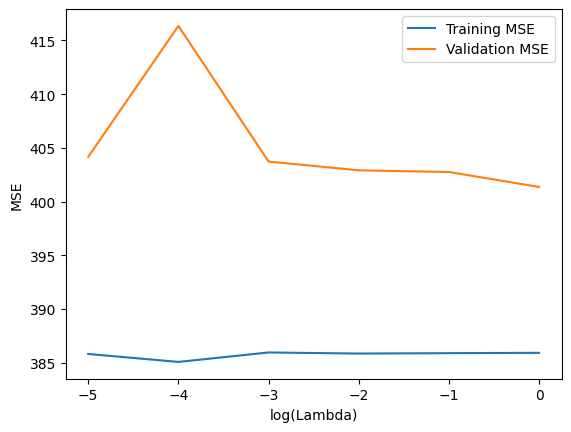

In [137]:
#4.f 
from sklearn.linear_model import Ridge
def cross_validation(X, y, k, model, loss_calculator):
    n = X.shape[0]
    idx = np.random.permutation(n)
    X_shuffled = X[idx]
    y_shuffled = y[idx]

    size = n // k

    validation_loss = np.zeros((n,))
    training_loss = np.zeros((n,))

    for i in range(k):
        start = i*size
        end = (i+1)*size

        X_test = X_shuffled[start:end]
        y_test = y_shuffled[start:end]

        X_train = np.vstack([X_shuffled[:start], X_shuffled[end:]])
        y_train = np.hstack([y_shuffled[:start], y_shuffled[end:]])

        model.fit(X_train, y_train)
        training_loss[i] = loss_calculator(model.predict(X_train), y_train)
        validation_loss[i] = loss_calculator(model.predict(X_test), y_test)

    return np.mean(validation_loss), np.mean(training_loss)



lambdas =  [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1]
validation_MSE = []
training_MSE = []

for l in lambdas:
    validation_MSE_current, training_MSE_current = cross_validation(X_train, y_train, 10, model=Ridge(alpha=1), loss_calculator=MSE)
    validation_MSE.append(validation_MSE_current)
    training_MSE.append(training_MSE_current)

    print(f"Lambda={l} has validation loss={validation_MSE_current} and training loss={training_MSE_current}")
    print("")

plt.plot(np.log10(lambdas), training_MSE, label='Training MSE')
plt.plot(np.log10(lambdas), validation_MSE, label='Validation MSE')
plt.legend()
plt.xlabel('log(Lambda)')
plt.ylabel('MSE')

best_lambda = lambdas[np.argmin(validation_MSE)]
ridge_best_lambda = Ridge(alpha=best_lambda).fit(X_train,y_train)
ridge_y_hat = ridge_best_lambda.predict(X_test)
ridge_mse = MSE(ridge_y_hat, y_test)
print(f"The best lambda was {best_lambda}.\nThis lambda gave MSE with ridge = {ridge_mse}.")


